<a href="https://colab.research.google.com/github/PBrunot/squid-game-doll/blob/main/collab-opencv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--2025-01-12 16:56:10--  https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/noidea.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70503 (69K) [image/jpeg]
Saving to: ‘noidea.jpg’

noidea.jpg          100%[===================>]  68.85K  --.-KB/s    in 0.02s   

2025-01-12 16:56:10 (3.10 MB/s) - ‘noidea.jpg’ saved [70503/70503]

--2025-01-12 16:56:10--  https://raw.githubusercontent.com/PBrunot/squid-game-doll/main/pictures/laser_on.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 251492

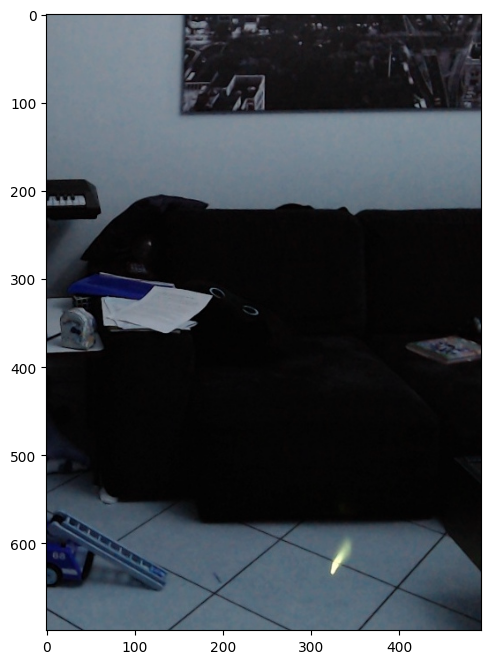

In [1]:
# Download the test image and utils files
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/noidea.jpg \
    -O noidea.jpg
!wget --no-check-certificate \
    https://raw.githubusercontent.com/PBrunot/squid-game-doll/main/pictures/laser_on.jpg \
    -O laser_on.jpg
!wget --no-check-certificate \
    https://raw.githubusercontent.com/PBrunot/squid-game-doll/main/pictures/laser_off.jpg \
    -O laser_off.jpg
!wget --no-check-certificate \
    https://raw.githubusercontent.com/PBrunot/squid-game-doll/main/pictures/frame-80.jpg \
    -O laser_green.jpg
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/utils/common.py \
    -O common.py

# These imports let you use opencv
import cv2 #opencv itself
import common #some useful opencv functions
import numpy as np # matrix manipulations

#the following are to do with this interactive notebook code
%matplotlib inline
from matplotlib import pyplot as plt # this lets you draw inline pictures in the notebooks
import pylab # this allows you to control figure size
pylab.rcParams['figure.figsize'] = (10.0, 8.0) # this controls figure size in the notebook

green_image=cv2.imread('laser_green.jpg')
plt.imshow(green_image)

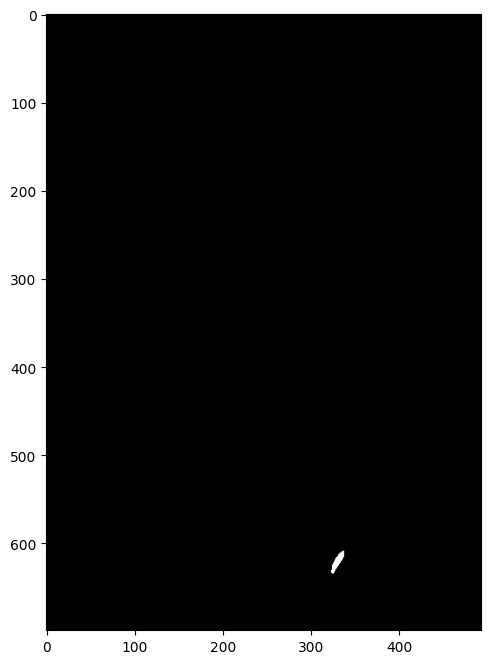

In [31]:
# split channels
_,g,_=cv2.split(green_image)
cv2.GaussianBlur(g, (5,5), 0, g)
r,diff_thr = cv2.threshold(g, 200, 255, cv2.THRESH_BINARY)
plt.imshow(diff_thr, cmap='gray')
masked_green = cv2.bitwise_and(g, g, None, diff_thr)


[[[341.5 626.5  17.2]]]


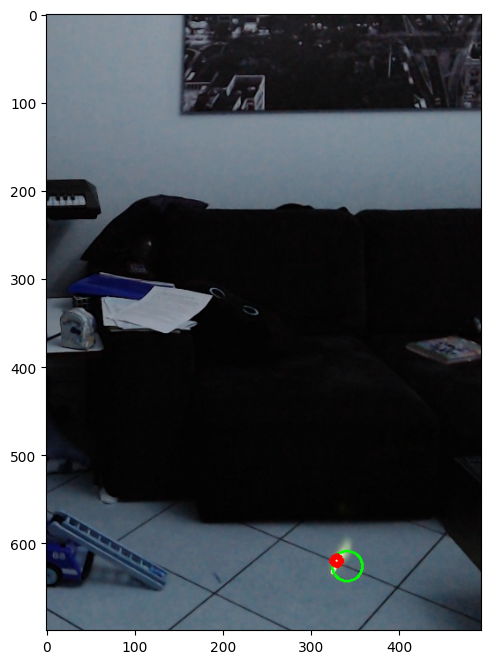

In [38]:
output = green_image.copy()
circles = cv2.HoughCircles(masked_green,cv2.HOUGH_GRADIENT,1, 50,
                             param1=400,param2=2,minRadius=5,maxRadius=20)
if circles is not None:
  print(circles)
  for circle in circles[0,:]:
    cv2.circle(img=output, center=(int(circle[0]),int(circle[1])), radius=int(circle[2]), color=(0,255,0), thickness=2)

count, labels, stats, centroids = cv2.connectedComponentsWithStats(masked_green)
for i in range(1,count):
    cv2.circle(output, (int(centroids[i,0]), int(centroids[i,1])), 5, (255, 0, 0, 0), 5)

plt.imshow(output)